![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [25]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [26]:
# Celda 1.1
bikes.groupby('season').total.mean()
season_stadistic = bikes.groupby('season')['total'].describe()
print(season_stadistic)

         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0


In [27]:
# Celda 1.2
bikes.groupby('hour').total.mean()
hour_stadistic = bikes.groupby('hour')['total'].describe()
print(hour_stadistic)

      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.674725  127.444294  10.0  123.00  183.0  265.50

La demanda de alquiler de bicicletas es mayor durante el verano y menor durante el invierno que puede estar relacionado con las condiciones climaticas.
Hay un claro patrón diario en el alquiler de bicicletas, con picos durante las horas de inicio y fin de la jornada laboral.
La desviación estándar es mayor durante las horas pico, pueder ser por fines de semana o clima.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

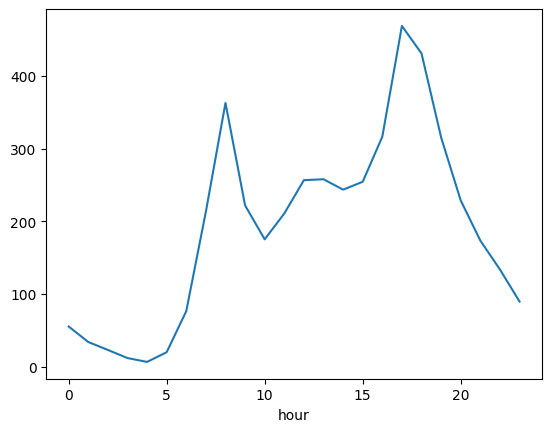

In [28]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

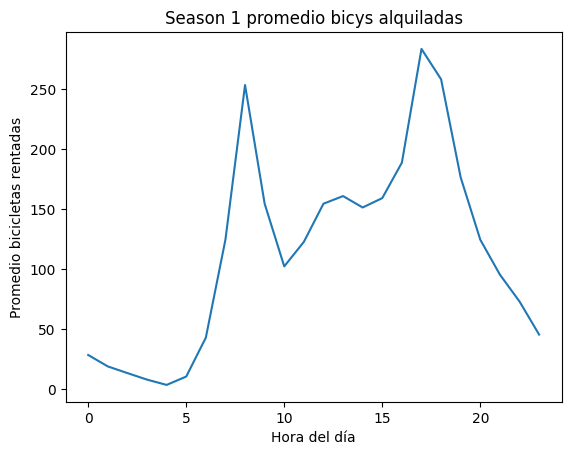

In [29]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt
season1_bikes = bikes[bikes['season'] == 1]
# Agrupar por hora y calcular la media de bicicletas rentadas, luego graficar
season1_bikes.groupby('hour').total.mean().plot()
plt.title('Season 1 promedio bicys alquiladas')
plt.xlabel('Hora del día')
plt.ylabel('Promedio bicicletas rentadas')
plt.show()

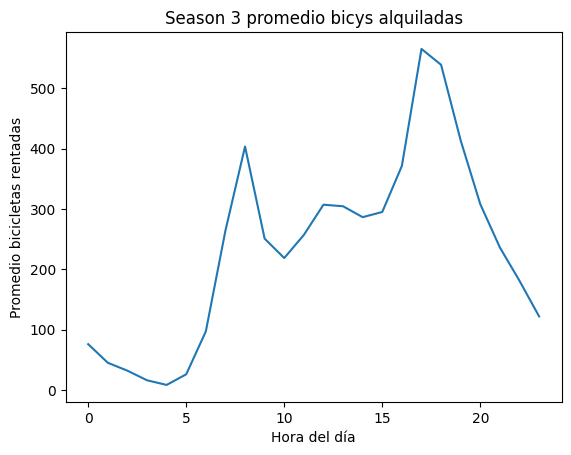

In [30]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
season3_bikes = bikes[bikes['season'] == 3]
# Agrupar por hora y calcular la media de bicicletas rentadas, luego graficar
season3_bikes.groupby('hour').total.mean().plot()
plt.title('Season 3 promedio bicys alquiladas')
plt.xlabel('Hora del día')
plt.ylabel('Promedio bicicletas rentadas')
plt.show()

Durante el verano, el número promedio de bicicletas rentadas es generalmente más alto en comparación con el invierno, lo que podría deberse a un clima más favorable.

Los picos de alquiler pueden variar entre estaciones. Por ejemplo, en verano, podrías ver un uso más extendido a lo largo del día, mientras que en invierno los picos podrían ser más pronunciados en horas específicas, posiblemente vinculadas al desplazamiento al trabajo o la escuela.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [39]:
from sklearn.linear_model import LinearRegression
# Crear variables dummy para 'season' porque es una variable categórica
bikes_dummy = pd.get_dummies(bikes, columns=['season'], drop_first=True)
# Definir las variables predictoras y la variable de respuesta
X = bikes_dummy[['hour', 'season_2', 'season_3', 'season_4']]  # 'season_1' es la categoría de referencia
y = bikes_dummy['total']
# Ajustar el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X, y)
# Imprimir los coeficientes
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lm.coef_})
print(coefficients)

    Feature  Coefficient
0      hour    10.545206
1  season_2   100.317232
2  season_3   119.467550
3  season_4    84.083118


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [34]:
from sklearn.metrics import mean_squared_error
# función para calcular MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Función calcular el mejor punto de division
def best_split(X, y, features):
    best_mse = np.inf
    best_feature = None
    best_value = None
    
    for feature in features:
        unique_values = X[feature].unique()
        for value in unique_values:
            left_mask = X[feature] <= value
            right_mask = X[feature] > value
            
            y_left, y_right = y[left_mask], y[right_mask]
            mse_left, mse_right = mse(y_left, y_left.mean()), mse(y_right, y_right.mean())
            
            mse_split = (len(y_left) * mse_left + len(y_right) * mse_right) / len(y)
            
            if mse_split < best_mse:
                best_mse = mse_split
                best_feature = feature
                best_value = value
    
    return best_feature, best_value, best_mse

# Construir el árbol de decisión
def tree_grow(X, y, depth=0, max_depth=3):
    if depth >= max_depth or len(X) <= 1:
        return {'value': y.mean()}
    
    feature, value, mse = best_split(X, y, X.columns)
    node = {'feature': feature, 'value': value, 'mse': mse}
    
    left_mask = X[feature] <= value
    right_mask = X[feature] > value
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    
    node['left'] = tree_grow(X_left, y_left, depth + 1, max_depth)
    node['right'] = tree_grow(X_right, y_right, depth + 1, max_depth)
    
    return node

# predicciones con el árbol
def tree_predict(observation, node):
    if 'value' in node:
        return node['value']
    
    if observation[node['feature']] <= node['value']:
        return tree_predict(observation, node['left'])
    else:
        return tree_predict(observation, node['right'])

# Construir arbol
tree = tree_grow(bikes[['hour', 'season']], bikes['total'], max_depth=3)

# Aplicar la función de predicción al conjunto de datos
bikes['predicted'] = bikes.apply(lambda row: tree_predict(row, tree), axis=1)

# Definimos las características y la variable objetivo
X = bikes[['hour', 'season']]
y = bikes['total']

# Calculamos la mejor partición utilizando la función best_split
j, split, gain = best_split(X, y, X.columns)

# Mostramos la mejor partición
print(f"Mejor característica para dividir: {j}")
print(f"Mejor valor para dividir: {split}")
print(f"Ganancia de la división: {gain}")
# Calcular y mostrar el MSE
mse_value = mean_squared_error(bikes['total'], bikes['predicted'])
print(f"MSE: {mse_value}")


Mejor característica para dividir: hour
Mejor valor para dividir: 6
Ganancia de la división: 22567.731076849588
MSE: 67248.05732133015


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

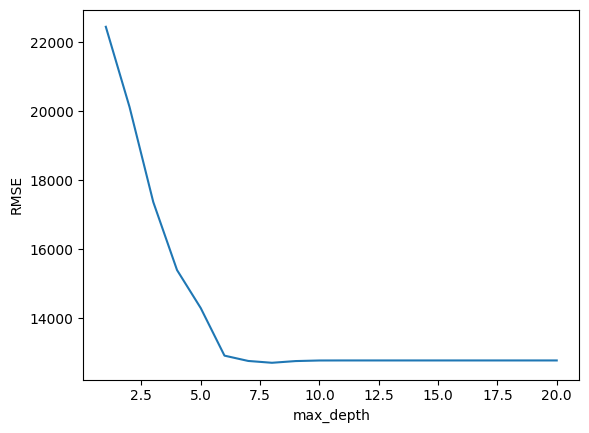

Mejor max_depth: 8 con RMSE: 12704.75788316308
  feature  importance
1    hour    0.865153
0  season    0.134847
RMSE en el conjunto de prueba: 117.38356662880372


In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Preparación datos
X = bikes[['season', 'hour']]
y = bikes['total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad
rmse_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de sklearn
    reg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    rmse_scores.append(-cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())

# Gráfica max_depth vs RMSE
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

# Mejor RMSE y max_depth
best_depth = sorted(zip(rmse_scores, max_depth_range))[0][1]
print(f"Mejor max_depth: {best_depth} con RMSE: {sorted(rmse_scores)[0]}")

# Ajustar un árbol usando el mejor valor de max_depth
reg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
reg.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': reg.feature_importances_}).sort_values('importance', ascending=False)
print(feature_importances)

# Evaluación del modelo en el conjunto de prueba
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE en el conjunto de prueba: {rmse}")


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [40]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [41]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [42]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

# calibracion de la profundidad máxima
max_depth_range = range(1, 21)
best_accuracy = 0
best_f1 = 0
best_depth = 0

for depth in max_depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    if accuracy + f1 > best_accuracy + best_f1:
        best_accuracy = accuracy
        best_f1 = f1
        best_depth = depth

print(f"Mejor profundidad: {best_depth} Accuracy: {best_accuracy} F1-Score: {best_f1}")

# Regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Regresión Logística - Accuracy: {accuracy_logreg}, F1-Score: {f1_logreg}")


Mejor profundidad: 5 Accuracy: 0.6373333333333333 F1-Score: 0.6616915422885572
Regresión Logística - Accuracy: 0.6186666666666667, F1-Score: 0.6092896174863388


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

#numero de estimadores
n_estimators = 100

# arboles de decisión con max_depth fijado
tree_ensemble_depth = BaggingClassifier(
    DecisionTreeClassifier(max_depth=5), n_estimators=n_estimators, random_state=1, n_jobs=-1)

# arboles de decisión con min_samples_leaf fijado
tree_ensemble_samples_leaf = BaggingClassifier(
    DecisionTreeClassifier(min_samples_leaf=5), n_estimators=n_estimators, random_state=1, n_jobs=-1)

#ensamble de regresiones logísticas
logreg_ensemble = BaggingClassifier(
    LogisticRegression(), n_estimators=n_estimators, random_state=1, n_jobs=-1)

# Entrenar los modelos
tree_ensemble_depth.fit(X_train, y_train)
tree_ensemble_samples_leaf.fit(X_train, y_train)
logreg_ensemble.fit(X_train, y_train)

# Función para evaluar y mostrar los modelos
def evaluate_predictions(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}, F1-Score: {f1}")

# Evaluar cada modelo
print("Evaluación Árboles de Decisión")
evaluate_model(tree_ensemble_samples_leaf, X_test, y_test)

print("Evaluación Regresión Logística:")
evaluate_model(logreg_ensemble, X_test, y_test)

# Votación mayoritaria para el ensamble completo
print("Evaluación del Ensamble Completo:")
evaluate_predictions(y_pred_total, y_test)

Evaluación Árboles de Decisión
Accuracy: 0.6446666666666667, F1-Score: 0.6458471760797342
Evaluación Regresión Logística:
Accuracy: 0.622, F1-Score: 0.6181818181818182
Evaluación del Ensamble Completo:
Accuracy: 0.658, F1-Score: 0.6595885865958858


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [52]:
# Calcula los pesos de entrenamiento
weights = []
for model in [tree_ensemble_depth, tree_ensemble_samples_leaf, logreg_ensemble]:
    y_train_pred = model.predict(X_train)
    weights.append(accuracy_score(y_train, y_train_pred))

weights = [weight / sum(weights) for weight in weights]

# Realiza la votación ponderada
y_pred_weighted = (weights[0] * tree_ensemble_depth.predict(X_test) +
                   weights[1] * tree_ensemble_samples_leaf.predict(X_test) +
                   weights[2] * logreg_ensemble.predict(X_test))

# Predicciones ponderadas en clases binarias
y_pred_weighted = np.round(y_pred_weighted)

# Evaluar el ensamble ponderado
print("Evaluación del Ensamble con Votación Ponderada:")
evaluate_predictions(y_pred_weighted, y_test)


Evaluación del Ensamble con Votación Ponderada:
Accuracy: 0.658, F1-Score: 0.6595885865958858


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [53]:
# Celda 9
print("punto 7 Accuracy: 0.658, F1-Score: 0.6595885865958858")
print("punto 8 Accuracy: 0.658, F1-Score: 0.6595885865958858")

punto 7 Accuracy: 0.658, F1-Score: 0.6595885865958858
punto 8 Accuracy: 0.658, F1-Score: 0.6595885865958858


Los modelos tienen un desempeño relativamente similar, la votación mayoritaria podría ser suficiente y más sencilla de implementar.
La votación mayoritaria puede ayudar a evitar el sobreajuste que podría surgir al asignar pesos basados en el desempeño en los datos de entrenamiento.